In [1]:
import gensim
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from itertools import combinations
from gensim.models import CoherenceModel


#my_doc=pd.read_csv('C:/Users/Kois/unLemmatizedCorpus.csv') #unLemmatized tokens
my_root=pd.read_csv('C:/Users/Kois/lemmatizedCorpus.csv') #Lemmatized tokens
my_root=my_root.drop(['Unnamed: 0.1'], axis = 1)
my_root=my_root.drop(['Unnamed: 0'], axis = 1)
my_root=my_root.to_numpy().tolist()

new_list=[]
temp_list=[]
for x in my_root:
    for item in x:
        if str(item) != 'nan':
            temp_list.append(item)
    new_list.append(temp_list)
    temp_list=[]

stop_words=['እኔ', 'የእኔ', 'እኔራሤ', 'እኛ', 'የእኛ', 'እኛራሣችን', 'አንቺ', 'ነህ', 'አላችሁ', 'እርሥዎ', 'ትፈልጋለህ', 'ያንተ', 'ራሥህን', 'እራሣችሁ', 'እሡ', 'የእሡ',
 'ራሡ', 'እሷ', 'እሷናት', 'የእሷ', 'እራሷ', 'ነው', 'እነሡ', 'እነሡን', 'የእነሡ', 'ራሣቸው', 'ምንድን', 'የትኛው', 'ማን', 'ይህ', 'የሚልነው', 'ያ', 'እነዚህ', 'እነዚያ', 'ነኝ', 'ናቸው', 'ነበር', 'ነበሩ', 'ሁን', 'ቆይቷል', 'መሆን',
 'አላቸው', 'አለው', 'ነበረው', 'ያለው', 'መሥራት', 'ያደርጋል', 'አደረገ', 'ማድረግ', 'ሀ', 'አንድ', 'የ', 'እና', 'ከሆነ', 'ወይም', 'ምክንያቱም','ነው', 'ነበር',
 'እንደ', 'እሥከ', 'እያለ', 'በ', 'ለ', 'ጋር', 'ሥለ', 'ላይ', 'መካከል', 'ወደ', 'በኩል', 'ወቅት', 'ከዚህበፊት', 'በኋላ', 'ከላይ', 'ከታች', 'ከ', 'ወደላይ', 'ታች', 'ውሥጥ', 'ውጭ', 'በላይ',
 'እንደገና', 'ተጨማሪ', 'ከዚያ', 'አንድጊዜ', 'እዚህ', 'እዚያ', 'መቼ', 'የት', 'ለምን', 'እንዴት', 'ሁሉም', 'ማንኛውም', 'ሁለቱም', 'እያንዳንዳቸው', 'ጥቂቶች', 'በጣም', 'ሌላ', 'አንዳንድ',
 'እንደዚህ', 'ብቻ', 'የራሡ', 'ተመሣሣይ', 'ሥለዚህ', 'ይልቅ', 'እንዲሁ', 'ት', 'ይችላል', 'ይገባል', 'ይገባኛል', 'አሁን', 'መ', 'ም', 'ኦ', 'ዳግም',
 'መሆን', 'ሁለ', 'ሁለም', 'ህዝብ', 'ሀሙሥ', 'ለመሆኑ', 'ለምንድን', 'ሌሎች', 'መጽሀፍ', 'ማክሠኞ', 'ምን', 'ሠኞ', 'ሠው', 'ሢሆን', 'ሥንት', 'ረቡእ',
 'ቅዳሜ', 'በዚህ', 'ብላ', 'ነገር', 'አለ', 'አርብ', 'አንተ', 'አንዳንድ', 'ኢትዮጵያ', 'እሁድ', 'እናንተ', 'እንኳን', 'እግር', 'ከመሆን', 'ወይንም', 'ዋና', 'ዘንድ', 'የሚከተለው', 'ያኔ', 'ይኼው', 'ገጽ', 'እነርሡ',
 'ን', 'ና', 'ዎች','ኛ', 'ይጠበቃል', 'ብለዋል', 'ሆ', 'ሁሉ', 'አንቀጽ', 'እንደሆነ', 'በማይበልጥ', 'መሠረት', 'ሁኔታ', 'ይሆናል', 'ሆኖ', 'ከአንድ', 'በማናቸውም',
 'ወር', 'ከአምሥት', 'በሆነ', 'ከዚህ', 'የሆነ', 'ሀያ', 'ሆነ', 'በኊላ', 'በአንድ', 'የሆኑ', 'ከአሥራ', 'የሆነውን', 'መሆኑ', 'ሌላውን', 'ከሠባት', 'ለሌላ',
 'አለበት', 'ሢል', 'ይሆናሉ', 'በሙሉ', 'አሥራ', 'ቢሆንም', 'አንዱ', 'የሌላውን', 'ከሁለት', 'የሆኑትን', 'በሆኑ', 'ጀምሮ', 'በመሆን', 'ባለ', 'ይህንን', 'እንዲቆይ', 'ሌላው', 'የሚሆነው', 'በአንዱ', 'ሢባል', 'ሣለ', 'የሆነው', 'መሆናቸው', 'በዋና', 'በማቀድ', 'ጊዜና', 'ለዚህ', 'ሦሥተኛ', 'የነገሩ', 'ሥድሥት', 'በሆነው', 'ይሁን', 'ከዚሁ', 'በእነዚህ', 'ከማናቸውም', 'ከነበረው',
 'በአንዳንድ', 'በእያንዳንዱ', 'ጊዜም', 'አሥከ', 'የሌሎች', 'የሚሆኑት', 'ከሆነው', 'የነበረውን', 'ያሉ', 'ከሌሎች', 'አንዲት', 'ለሌሎች', 'ለሆነው', 'ሠኣት', 'ብሎ', 'ከሠላሣ',
 'የሚሆኑ', 'ላይም', 'የሆናል', 'ከነዚህ', 'ያህል', 'ከሆነና', 'ለሆኑት', 'እነዚሁ', 'እንደሆኑ', 'ሥለማናቸውም', 'ሥለዚሁ', 'ከአንዳንድ',
 'በእነዚሁ', 'በአምሥት', 'የሆኑበታል', 'ለነዚህ', 'ለማንኛውም', 'አንደኛ', 'ይኸኛው', 'ከርሡ', 'መሆኑን', 'ለዚያው', 'ለዚሁ', 'ለእነርሡም', 'እዚሁ', 'ሀ', 'ረ', 'ሸ', 'አምሥት',
 'ከሦሥት', 'በተለይም', 'በሌላ', 'ሺህ', 'ማናቸውንም', 'ከአሥር', 'የማይበልጥ', 'እንዲሁም', 'ይህን', 'የዚህ', 'ማናቸውም', 'ከሥድሥት', 'መቶ', 'ያለ', 'አንድን',
 'ያላቸውን', 'ሊሆን', 'ሦሥት', 'ካልሆነ', 'ቢያንሥ', 'ቢሆን', 'እነዚህን', 'አንዱን', 'ሁለት', 'ወይዘሮ', 'ተብሎ', 'ሣይሆን', 'እንደሆነና', 'ከብር', 'ሆኖም', 'የነበሩ',
 'የሌላ', 'ያላቸው', 'ይህንኑ', 'ሆነው', 'በሥተቀር', 'ሥም', 'እንደገና', 'የማያንሥ', 'እጅግ', 'እንዲሆን', 'እንኳ', 'ከሀያ', 'ከሀምሣ', 'ይኸው', 'ለአንድ', 'የሚችለውን',
 'በሚገባ', 'ይህም', 'እንዲሆኑ', 'ከሌላ', 'ለሆነ', 'በሌሎች', 'አንደሆነ', 'እንዲህ', 'በነዚሁ', 'በእንደዚህ', 'ሥምንት', 'ሢሆንና', 'ምንጊዜም', 'ለማናቸውም', 'የአንድ', 'እነዚህኑ', 'ሢሆኑ', 'በሁለቱም',
 'እንደነዚህ', 'የሆኑት', 'የማናቸውም', 'ይህንንም', 'የአንድን', 'በሙሉም', 'በነዚህ', 'የዚሁ', 'ለእያንዳንዱ', 'ሥለሆነ', 'መሆናቸውን', 'ማንኛውንም', 'ሁለቱ', 'እንጂ',
 'ከሥምንት', 'ሁለቱንም', 'በሁለት', 'በእሥር', 'በሚል', 'ቁጥር', 'ባሉ', 'ከመቶ', 'እነዚህም', 'ሢኖር', 'ሠላሣ', 'ለሆኑ', 'ሠባት', 'እነደሆነ', 'ይህችው', 'ከእነዚህ',
 'ከእነዚሁ', 'የአንቀጹ', 'ወይ', 'የሆነችን','እኮ','ኧረ','ጋ','እንዴ','ነበረ','ነዉ']

def stopWordRemoval(tokens):
    token_new=[]
    for x in tokens:
        if x not in stop_words:
            token_new.append(x)
    return token_new


processed_docs=[]
for item in new_list:
    processed_docs.append(stopWordRemoval(item))

#remove verbs
listOfVerbs="ተሰለፈ,ድርግ,ሰጠ,ገባ,አወቀ,መሰለ,መጣ,ጠማ,ነደደ,ወጣ,ለየ,ጣለ,ነዳ,ኖረ,ተከለ,ፈለገ,ወሰነ,ቻለ,ተገኛኘ,መታ,ሰረረ,ባከነ,አነሰ,ደገመ,ያዘ,አነሳ,አለቀ,አስቀመጠ,ለበሰ,ላከ,አወገዘ,አካሄደ,ገደለ,አለፈ,ቀረረ,ለቀቀ,ለመጠ,ጀመረ,ተናገረ,ገመተ,ዶለ,ፈጠረ,ሰቀቀ,ፈጸመ,ቀረ,አየ,ቈየ,ዘገበ,በላ,ተባለ,ፈላ,ቀነተ,ፈታ,ሞተ,ገለጸ,ገለጠ,ደበነ,ሰደደ,ጐለተ,ተቈጣ,ማረ,አፈረ,ዘረዘረ,ጠበቀ,ተወ,መረጠ,ተቀበለ,ተመቸ,ደረደረ,ተመለከተ,ጨፈነ,ዞረ,ዠለጠ,ነፈሰ,ተሸነፈ,አማ,ረጋ,ተቃወመ,ቀየረ,አለመ,ገገረ,ቀለለ,ተዘጋጀ,ዋለ,ቆመ,ተላለፈ,ቀነበረ,ጨረሰ,ቋጠረ,ተሰራጨ,አራ,ሾመ,ስምር,ተራመደ,ቀፈፈ,ተቋቋመ,ረገበ,ሰከረ,ለቀለቀ,ታገለ,አጐነበሰ,አሰረ,ረገጠ,ተጠረጠረ,ነካ,ተነሳ,አበለ,ጠቀመ,አረገ,ጠፋ,ወደቀ,ነዛ,ደረሰመ,ገረረ,ቀጠፈ,ረሳ,ፈጀ,ሰለቸ,ለወጠ,ደከመ,ሄደ,ሰደበ,ቀላ,ቀረጸ,ፎከረ,ወቀረ,ተማረ,ወለደ,ሳበ,ሰራ,ቀደሰ,አደረ,ለመደ,ተረጐመ,ሰፈነ,ፈነጠቀ,ቀለደ,ገበየ,ወቃ,አመሰ,አጣ,ዘፈነ,ተደረገ,ወሰደ,ነጐደ,ቀቀለ,አናገረ,በሳ,መጠነ,ተካሄደ,ተንጠባጠበ,ረዘመ,መከረ,መሰከረ,ከለከለ,ፈራ,ወደደ,ደገፈ,ተጫወተ,ለመለመ,ተሰቃየ,ዘና,ተሸበረ,ገነባ,ጨበጨበ,ቈረቈረ,ቈረጠ,ጨቈነ,ቀረበ,ተሳበ,ሸጠ,ገዛ,ላላ,ባሰ,ተቀመጠ,ቀጠለ,ደፈነ,ተመለከ,ቀደመ,ፈሳ,ተመኘ,ነቃ,መጠጠ,ሮጠ,ተመካ,ቀደደ,ተከተለ,ተወራ,ናደ,ቀጣ,ገታ,ቀሰቀሰ,ተሻገረ,ጠየቀ,ፋቀ,ጣረ,ተደሰተ,ለመነ,ወተወተ,ቀማ,በጠበጠ,ዋጠ,ተከበረ,ቸገረ,ተቀየመ,ተጠቃ,አረመ,ዘረፈ,ጠራ,ሳቀ,አስተማረ,ጠረገ,አመጠ,ተያያዘ,ጻፈ,ገረመ,አከከ,ደረቀ,ተንበረከከ,ተለጐመ,ከሳ,ተጨነቀ,ዋሸ,ተታለለ,ሰፈረ,ፈተነ,በረከተ,ተከላከለ,ተሳተፈ,ገፋ,ተመሰገነ,ሰለጠነ,ተንቀሳቀሰ,ተወዳጀ,ጨፈረ,ተመጻደቀ,ተባበረ,ጠነከረ,ተቀዳጀ,ተንፈረጠጠ,ጠቀሰ,ቈጠረ,ዘረጋ,ጠቀለለ,ባረከ,ሳተ,ሸረሞጠ,ላጠ,ዳጠ,ነጠቀ,ተከናወነ,ላገ,በደለ,ጨበጠ,ዘጋ,ጨቀጨቀ,ላፈ,ነሳ,ወረረ,ዳነ,ዘከዘከ,አቀደ,ተገለገለ,ተመነ,አመመ,ገጠመ,ተመረኰዘ,ተዳረሰ,ታጠቀ,አፈነ,ተንከባከበ,ኰነነ,ተቃጠለ,አረደ,ፈረሰ,ተደራጀ,ጠለዘ,ቀረጠፈ,ተዘናጋ,ሻ,ከሰሰ,ረገመ,ተገደደ,ተጨናነቀ,ጠረቀመ,ቀነሰ,ረካ,ዳበረ,ጐለበተ,አለበ,ወረወረ,ጨፈለቀ,ተኛ,ደበቀ,ቈረጠመ,መዘገበ,ላመ,ወከለ,ነቀለ,ኰሳ,ሸለለ,አሸ,ጠዳ,ተተራመሰ,ዘመተ,ጸደቀ,ከተመ,ሰካ,ታወረ,ተሳካ,ነጣ,አገዘ,ገደበ,ተሳሳተ,ለፋ,ተበላሸ,ሸመቀ,ናፈቀ,ሰበሰበ,ጠለፈ,ተከፋ,ተሻሻለ,ከሰመ,ፈቀደ,ተጋ,ጐደለ,ቈጨ,ነባ,አስቻለ,በረረ,ከፈተ,አለለ,ጠመመ,ወጠረ,ገበረ,ታታ,ገለበጠ,ሸመገለ,ደነበረ,ተደናቀፈ,ሰላ,መረረ,ጠቈመ,ጋበዘ,ቀበረ,ጫነ,ናቀ,ሰወረ,ቀሰረ,ተቸ,መረመረ,መዘነ,ወደመ,ተወዳደረ,ተከባበረ,ተዳደረ,ተሰኘ,ጋረጠ,ፈሰሰ,ገነዘ,አደለ,አሸገ,ደፋ,ጸለየ,ደወለ,ጠጣ,ተጠጋ,ዳመጠ,መሰገ,ቀላቀለ,ማለ,ዘመረ,ሰየመ,ጣሰ,ለቀመ,አከፋፈለ,ጸነነ,በጠሰ,ጣፈ,ታወሰ,አለቀሰ,አበደ,ዘራ,አጨደ,ተጨማለቀ,ጮኸ,ከሰከሰ,መሸ,ታበየ,ጋረ,ማረረ,አጽናና,ተግባባ,መነጨ,አጠበ,ረጨ,ለፈለፈ,አደሰ,ሞገተ,አቻለ,ወረሰ,ሞከረ,ተሳነ,ወፈረ,ተከዘ,ነከሰ,አረረ,ተዛዘበ,ሸተተ,ፈነቀለ,ወቀሰ,ሳሳ,ዘነጋ,ገራ,ተበጀ,ካሰ,ደነዘዘ,ረበረበ,ጸዳ,ተከታተለ,ተገነዘበ,አዘነበለ,ተወሀደ,ራቀ,ዘነነ,ገጨ,ከተበ,ሸረሸረ,አለቃቀሰ,ተነገረ,ተላላከ,ቀዳ,ጠባ,ፈነዳ,ተወናበደ,ተስተካከለ,ጠበበ,ቈሸሸ,ተጠነቀቀ,ደነገጠ,ተጓዘ,አቀፈ,መገበ,ፈካ,ፈወሰ,ሻረ,ዛለ,ተከራየ,አስተዋለ,ጠበሰ,ተኰሰ,ተጠና,ተነፈሰ,በተነ,ቈፈረ,ጠረበ,ተደመመ,ዘቀጠ,ተዋከበ,ቃመ,ናወዘ,ተልከሰከሰ,አርጋጋ,ተሽከረከረ,ተለተመ,ተጣደፈ,ዋተተ,ተገለለ,ዶለተ,ነፈገ,ተጠናቀቀ,በሰለ,ደመደመ,አከተ,ሰጋ,ማረከ,በረቀ,ቈለለ,ማቀቀ,ተወገደ,ተኰላሸ,ዋጀ,ተረተ,ተስማማ,ረባ,ፈጠጠ,ፋረ,ሰነጠቀ,ደበደበ,ደፈረሰ,ተጠናወተ,ቀሰመ,ኰላ,አጠፈ,ጣመ,አፈሰ,ነፋ,ረፈደ,ተዋረደ,ሰነዘረ,ተቋረጠ,አወጋ,ተንጠለጠለ,አረሰ,ከለበ,ተከራከረ,ፈተሸ,አተመ,ቈሰለ,ተደለደለ,ገመገመ,ተነጻጸረ,ተዋወቀ,ተሸከመ,አረቀ,አገደ,ተቻቻለ,ሰመጠ,ወጋ,ተደመጠ,ፈለፈለ,ጨከነ,ከተተ,ዘባረቀ,መረተ,አመለጠ,ነከተ,ተመቻቸ,ሸፈነ,ጠመዘዘ,ሰበረ,ሰረቀ,ወለቀ,አነበበ,ገረፈ,መረቀ,አጠረ,ተምታታ,ሰበከ,ዳረ,ሰዋ,ለኰሰ,ተካረረ,አደነ,ራሰ,ቀረፈ,ሰለመ,ጠነባ,ሰገደ,ጐበኘ,ከረፋ,አኘከ,ወነጀለ,ተጣመረ,ጓጓ,ዘነጠ,ደበለቀ,ፈዘዘ,አጀበ,ከተፈ,መደበ,ቀጠረ,ተለማመጠ,ተበደረ,ጠፈፈ,ታገሰ,አነቀ,ሰነበተ,ደረተ,ሰቀለ,ደፈረ,ዘለፈ,ጨፈጨፈ,ረቀቀ,ተነጋገረ,ተከፈፈ,ተሰናበተ,ላሰ,ሰለበ,ዳሰሰ,ራበ,ሸኘ,ቀባጠረ,ተርበተበተ,አመሸ,ተሳለቀ,ቸከ,ገዘገዘ,ዳከረ,ገዘፈ,ጐተተ,ጋጠ,ጾመ,ወቀጠ,ተሞገሰ,ጠገበ,ከጀለ,ተሸቀበ,ረሸነ,ተረከበ,ዘገነነ,ከረከረ,ተሞሸረ,ፈረመ,ሸመተ,ከበተ,አስመለሰ,ፈለጠ,ረበሸ,ደጐመ,ተነጣጠረ,ሰረሰረ,ገላገለ,ተዛመደ,ተጃጃለ,በሰበሰ,ዋለለ,ተበሳጨ,ረጠበ,ተንጨረጨረ,ተረከ,ኰለኰለ,ካነ,አረጠ,ካደ,ወዘወዘ,ረበበ,ተቈጣጠረ,ተጸጸተ,አላመጠ,አካፈለ,ሸመጠጠ,አኰረፈ,ለጠፈ,አወከ,ገነጠለ,ጐነጐነ,ቀለመ,ተለመ,ቈጠበ,ዛገ,ነደለ,ገመደ,ሰገሰገ,ጋረደ,ተጠተተ,መረዘ,ደረገመ,ሸና,ተጸነሰ,ጨነገፈ,አስተናገደ,ሸቀጠ,ነቀነቀ,ተቃረነ,ተመለጠ,ተፋ,አሾፈ,ሸሸ,ጠረዘ,ተበላለጠ,ቀባ,ደለበ,ዋኘ,ፈረጠ,ከለሰ,በረደ,ተሸማቀቀ,ቀጠቀጠ,ሰነገ,ተግደረደረ,ቀየሰ,ጫረ,አነጠሰ,ተዘዋወረ,ተካፈለ,ተጥለቀለቀ,ተጭበረበረ,ሰከነ,ተዘወረ,ተንቀጠቀጠ,ጠመጠመ,ሰረዘ,አስተጋባ,ከሰረ,ጠለቀ,ተንከረፈፈ,ዘመመ,ሞቀ,ዳሰ,ፈነጠረ,ተለቀ,ቀበጠ,ተገናዘበ,ከሸፈ,ተነተነ,ዳረገ,ቃኘ,ገፈፈ,ጃጀ,ሰቀጠጠ,ተፍጨረጨረ,ነደፈ,ጋለ,ተንሳሳ,ደገሰ,ጀገነ,ቀለጠ,ዛተ,መለለ,ተባባለ,ተስፈነጠረ,ጠመደ,አነከሰ,ጠመቀ,ተገመሰ,ለጠቀ,ማገ,ቋጨ,ተዋሰ,ገሰገሰ,ወረፈ,ተቀኘ,ተነኰተ,ቀላወጠ,ሰየፈ,ጨለፈ,ቸረ,ተረተረ,በከለ,ተወላከፈ,አመላከተ,ከለለ,አጐረ,መነመነ,አበሰ,ደገነ,ሰነፈ,ተጠየፈ,ተነገተ,ወገረ,ቻቻለ,ቀጨጨ,ከረከመ,ራደ,ተኰፈሰ,ተነጠለ,ታጨ,ተንጫጫ,ወሰለተ,ወሸቀ,ኰሰመነ,ተነጫነጨ,ዘረገፈ,ተንሳፈፈ,ተፋጨ,ሾለ,ተንፈራፈረ,ጐረበጠ,ጠቈረ,ቀመሰ,ነተበ,ደላ,ፈረጠጠ,ደነቈረ,መነጠረ,ደመሰሰ,ተዛወረ,ሳገ,ተባ,ሻጠ,ሳመ,ኰረጀ,ረከሰ,ቀዘነ,ከሸነ,በዘበዘ,ተፋለመ,ተደለቀ,ተፈናጠጠ,ከካ,ወዛ,ፈነጨ,አጠነ,ዳበሰ,አመራ,ረገፈ,ገለበ,ፈየደ,ተራቈተ,ጐሰቈለ,ሸቀለ,ሰበቀ,ተቅነዘነዘ,ሰለቀ,ለዘበ,ደሰመ,አሴረ,ተጋዘ,ለሰለሰ,ቀሰፈ,ተንከራተተ,ማገደ,ፈነከተ,ዘላበደ,ዘበዘበ,ተንደላቀቀ,ተደረሰ,ሸረፈ,ተቅለሰለሰ,ተላከከ,ተሻማ,ደፈቀ,ነጠረ,ዘረረ,ደለለ,ተቀጣጠለ,ተውተረተረ,ጐረፈ,ተደረበ,ቸለሰ,ተንደረደረ,ተናጠ,ተከማቸ,ፈተፈተ,ተንሸራተተ,ቀጠነ,ተትረፈረፈ,ኳለ,ጨለመ,ነፈረ,ከሰለ,ተፋጀ,ተዳበለ,ወጠነ,አጋመሰ,ለበለበ,ሸመቀቀ,ተካተተ,ተዋበ,አከመ,ኰረፈ,በገነ,ደበዘዘ,ጠበጠበ,ተቃቃመ,ጋመ,መነዘረ,ዘየደ,ወረዛ,ቀነጠሰ,ነቀሰ,ተገዘተ,ተረባረበ,ጐበዘ,ለጠጠ,ደደበ,ተንጣለለ,ተንቀለቀለ,ሰጠመ,ታከከ,ተቈራ,ጠገነ,ቦረቀ,ከተከተ,ተሽኰረመመ,አመለከተ,ተቀለበ,ለሰነ,ተቈራኘ,ሞገደ,ፈነደቀ,መሰነ,ተዝረከረከ,ሸመደደ,ተንበለበለ,ዘበተ,ቦዘ,ገነፈለ,ነቀፈ,ተጸየፈ,ተደላደለ,ደሰሰ,ነዘረ,ሳለ,ቀዘቀዘ,ነዘነዘ,ደደረ,ተበጠረ,ባተ,ተመሳቀለ,አጠራጠረ,ገነገነ,ነከረ,ተሳደደ,አለጠ,ደቀደቀ,መተረ"
listOfVerbs=listOfVerbs.split(",")
no_verb=[]
verb_set=set(listOfVerbs)

for item in processed_docs:
    item_set=set(item)
    no_verb.append(list(item_set.difference(verb_set)))
processed_docs=no_verb     
    
 #covert list into a single string
text_data=[]
docgen=[]
for x in processed_docs:
    str_docs=' '.join(x)
    text_data.append(str_docs)
    for item in x:
        docgen.append(item)
       
        
# converting the given text term-document matrix
 
vectorizer = TfidfVectorizer(max_features=1500, min_df=10)
X = vectorizer.fit_transform(text_data)
words = np.array(vectorizer.get_feature_names())

coherences=[]
k_values=[]
for j in range(2,21):
    nmf = NMF(n_components=j, solver="mu")
    W = nmf.fit_transform(X)
    H = nmf.components_
    k_values.append(j)
    #save model
    filename = "NV_NMF_k{}.pkl".format(j)
    pickle.dump(nmf, open(filename, 'wb'))
    # get topics lists
    topics=[]
    temp=[]
    for i,topic in enumerate(H):
        for x in words[topic.argsort()[-10:]]:
            temp.append(x)
        topics.append(temp)
        temp=[]
    
    #build dictionary
    dictionary = gensim.corpora.Dictionary(processed_docs)
    # create BOW dictionary
    bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
    
    cm_nmf = CoherenceModel(topics=topics, 
                          model=nmf,
                          dictionary=dictionary, 
                          corpus=bow_corpus, 
                          texts=processed_docs, 
                          coherence='c_v')
    coherence_nmf = cm_nmf.get_coherence()  
    coherences.append(coherence_nmf)
    

C:\Users\Kois\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


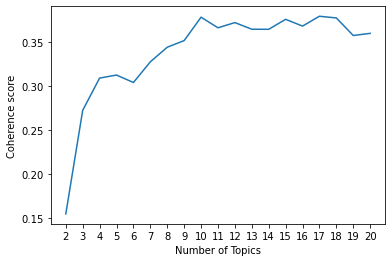

In [2]:
plt.plot(coherences)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.xticks(range(len([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])),k_values)
plt.show()

In [3]:
coherences

[0.15440935408339837,
 0.27259671584510337,
 0.3093548642884002,
 0.3128357512245488,
 0.3043092327439059,
 0.32794033044345733,
 0.34455699732736944,
 0.35214157803690416,
 0.3788348797839361,
 0.3667224199126642,
 0.372668643771812,
 0.3650923961789855,
 0.36501194839273116,
 0.3764032128155292,
 0.3686821273753791,
 0.3799068766157299,
 0.3779606029602735,
 0.35794839654720456,
 0.36038834893263444]

In [4]:
k_values

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [7]:
nmf1 = pickle.load(open('C:/Users/Kois/LDA_Code/LDA_Code/WV_NMF_k17.pkl', 'rb'))
cm_nmf1 = CoherenceModel(topics=topics, 
                          model=nmf1,
                          dictionary=dictionary, 
                          corpus=bow_corpus, 
                          texts=processed_docs, 
                          coherence='c_v')
coherence_nmf = cm_nmf1.get_coherence()
coherence_nmf

0.36038834893263444

In [8]:
# Applying Non-Negative Matrix Factorization
 
W = nmf1.fit_transform(X)
H = nmf1.components_

for i, topic in enumerate(H):
     print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in words[topic.argsort()[-10:]]])))

Topic 1: አሰበ,ፊት,አይነት,ሀሳብ,ቤት,ቀን,ምርጫ,ችግር,ጊዜ,ጥር
Topic 2: ለም,ምግብ,ትንሽ,ውሸት,ትክክል,አመነ,ይሄ,አሰበ,ከባድ,ግን
Topic 3: ደሞ,መራ,ጥቃት,ትግራይ,ጥያቄ,ኦሮሞ,ኦሮሚያ,ሙስሊም,ክልል,አማራ
Topic 4: መሪ,አሜን,መራ,በዛ,አንድነት,እናት,አል,ፍቅር,ሰላም,ሀገር
Topic 5: ቅዱስ,ገና,ጥቃት,ጌታ,ሙስሊም,አሜን_አሜን,አል,አበረ,አሜን,ደረሰ
Topic 6: ህመም,ዛሬ,ደም,ምክንያት,ስቃይ,ቤተሰብ,ዜና,አይነት,ድምጽ,ሰማ
Topic 7: ህጻን,እረ,ይሄ,ደህና,ተስፋ,ወንድ,አባት,ሴት,እናት,ልጅ
Topic 8: ትንሽ,ምናምን,እርምጃ,ሚዲያ,ታሪክ,እውነት,ነው,ውሸት,መሪ,ውነት
Topic 9: ፊት,ፖለቲካ,ስብሰባ,አባል,ህወሀት,ኢዜማ,ምርጫ,መሰረተ,ፓርቲ,ብልጽግና
Topic 10: አስር,ጌታ,መሰረተ,ምክንያት,ሰላም,ፍቅር,ፈረንጅ,ዘመን,አመት,አዲስ
Topic 11: ችግር,እውቀት,ቋንቋ,ደሞ,አመነ,አባት,ውርእ,ድንጋይ,ልክ,ራስ
Topic 12: መብት,ደህንነት,እጅ,ቤተ,መራ,ሀላፊነት,ጉዳይ,አብይ,ህግ,መንግስት
Topic 13: እርስ,እጅ,አምላክ,ሆይ,አሜን,ቅዱስ,ተስፋ,ቃል,ፍቅር,እግዚአብሄር
Topic 14: እስኪ,ሰው,ወይስ,ሰአት,ከባድ,አዲስ_አበባ,ትንሽ,ወጣት,ውጥእ,ስራ
Topic 15: ታህሳስ,አካል,አሜሪካ,ሞጣ,ቦታ,ውይይት,ቤት,ከተማ,ዛሬ,ተገኘ
Topic 16: ነገረ,ታህሳስ,ዜና,ውድ,ገና,ቀን,ልደት,አል,ዛሬ,መልካም
Topic 17: አቋም,ነገረ,ገና,አለባቸው,መገናኛ,ድል,ሀሳብ,ተስፋ,ትምህርት,ብዙ
